In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# cross validation methods
from sklearn.model_selection import (StratifiedKFold, StratifiedShuffleSplit, 
                                     RepeatedStratifiedKFold, LeaveOneOut)

In [185]:
from scipy.stats import ttest_ind

In [4]:
data = pd.read_csv('data/GermanCredit/GermanCredit.csv', index_col=0)
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
1,6,1169,4,4,67,2,1,0.0,1.0,Good,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,48,5951,2,2,22,1,1,1.0,1.0,Bad,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,12,2096,2,3,49,1,2,1.0,1.0,Good,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,42,7882,2,4,45,1,2,1.0,1.0,Good,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,24,4870,3,4,53,2,2,1.0,1.0,Bad,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null float64
ForeignWorker                             1000 non-null float64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null float64
CheckingAccountStatus.0.to.200            1000 non-null float64
CheckingAccountStatus.gt.200              1000 non-null float64
CheckingAccountStatus.none                1000 non-null float64
CreditHistor

In [6]:
data.nunique().value_counts()

2      54
4       3
1       2
53      1
33      1
921     1
dtype: int64

In [13]:
data.shape

(1000, 62)

In [14]:
data['Class'].value_counts(normalize=True)

Good    0.7
Bad     0.3
Name: Class, dtype: float64

In [17]:
data.columns = data.columns.str.replace('.', '_')

In [24]:
y = data['Class'].values
X = data.loc[:, data.columns.str.contains('_')]    # all dummy variables from 11 categorical features

y.shape, X.shape

((1000,), (1000, 52))

In [25]:
X.head()

,CheckingAccountStatus_lt_0,CheckingAccountStatus_0_to_200,CheckingAccountStatus_gt_200,CheckingAccountStatus_none,CreditHistory_NoCredit_AllPaid,CreditHistory_ThisBank_AllPaid,CreditHistory_PaidDuly,CreditHistory_Delay,CreditHistory_Critical,Purpose_NewCar,...,OtherInstallmentPlans_Bank,OtherInstallmentPlans_Stores,OtherInstallmentPlans_None,Housing_Rent,Housing_Own,Housing_ForFree,Job_UnemployedUnskilled,Job_UnskilledResident,Job_SkilledEmployee,Job_Management_SelfEmp_HighlyQualified
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### subsampling methods
* stratified 10-folds cv
* 5 repeated stratified 10-folds cv
* 50 repeated stratified train-test split
* Leave One Out cv

In [56]:
test_size = .2

sk10 = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
r5sk10 = RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=42)
ss50 = StratifiedShuffleSplit(n_splits=50, test_size=test_size, random_state=42)
loo = LeaveOneOut()

cv_choices = {
    '10fold': sk10,
    '5repeated_10folds': r5sk10,
    '50splits': ss50,
    'leave_one_out': loo,
}

### Splitting train/test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    stratify=y, random_state=42)

X_train.shape, X_test.shape

((800, 52), (200, 52))

#### Within model comparison

In [46]:
svc_pipe = make_pipeline(StandardScaler(), SVC(gamma='scale'))

params = {'svc__C': np.logspace(-2, 7, num=10, base=2), }

In [61]:
cv_results = {}

for cv in cv_choices:
    print("Starting: {} training".format(cv))
    print('-'*(len(cv)+19))
    svc_grid = GridSearchCV(svc_pipe, params, scoring='accuracy', n_jobs=4, 
                            cv=cv_choices[cv], verbose=1, return_train_score=True)
    svc_grid.fit(X_train, y_train)
    cv_results[cv] = pd.DataFrame(svc_grid.cv_results_)
    print('='*50)
    print()

Starting: 10fold training
-------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



Starting: 5repeated_10folds training
------------------------------------
Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   22.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



Starting: 50splits training
---------------------------
Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   19.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



Starting: leave_one_out training
--------------------------------
Fitting 800 folds for each of 10 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 4876 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 6376 tasks      | elapsed:  5.3min


[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  6.9min finished


In [62]:
cv_results.keys()

dict_keys(['10fold', '5repeated_10folds', '50splits', 'leave_one_out'])

In [63]:
a = cv_results['10fold']

In [65]:
a.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_svc__C', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [125]:
def plot_train_and_valid_scores(cv_df, ax=None, error_bar=True):
    ax = ax or plt.gca()
    
    xs = cv_df['param_svc__C'].values.astype(float)
    
    n_splits = cv_df.columns.str.contains('split').sum() / 2
    
    val_2sd = cv_df['std_test_score'].values/np.sqrt(n_splits)  # 1 S.E.
    val_scores = cv_df['mean_test_score'].values
    tr_scores = cv_df['mean_train_score'].values


    if error_bar:
        ax.errorbar(xs, val_scores, val_2sd, linestyle='--', 
                    marker='.', label='valid', uplims=True, lolims=True)
    else:
        ax.plot(xs, val_scores, '.--', label='valid')
        
    ax.plot(xs, tr_scores, 's-', label='train')
    ax.semilogx(basex=2)
    ax.legend(loc='best')
    return ax

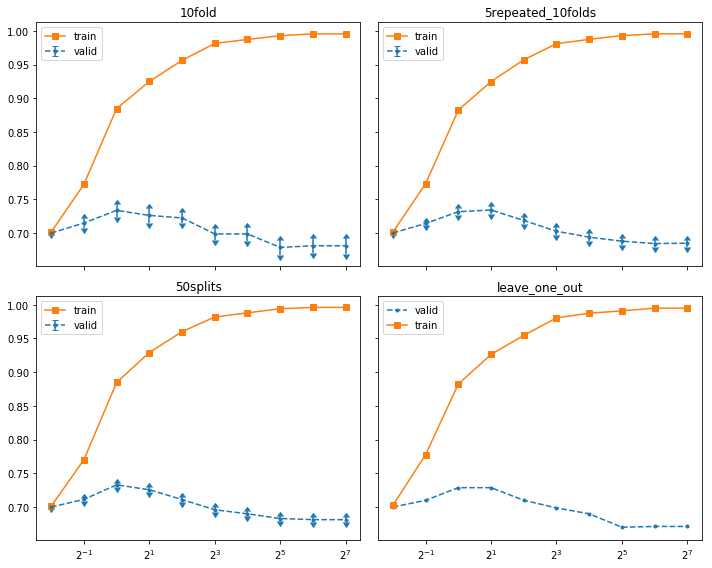

In [126]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8),
                        sharex=True, sharey=True)

n_splits = [10, 50, 50, 800]

error_bars = {'leave_one_out': False}
for cv, ax in zip(cv_results, axs.flat):
    ax = plot_train_and_valid_scores(cv_results[cv], ax=ax, 
                                     error_bar=error_bars.get(cv, True))
    ax.set_title(cv)
    
fig.tight_layout()

In [115]:
for cv in cv_results:
    print(cv, cv_results[cv].shape)

10fold (10, 31)
5repeated_10folds (10, 111)
50splits (10, 111)
leave_one_out (10, 1611)


In [123]:
cv_results['10fold']['mean_test_score']

0    0.70000
1    0.71500
2    0.73375
3    0.72625
4    0.72250
5    0.69875
6    0.69875
7    0.67875
8    0.68125
9    0.68125
Name: mean_test_score, dtype: float64

In [124]:
cv_results['10fold']['std_test_score'] / np.sqrt(10)

0    0.000000
1    0.006801
2    0.010008
3    0.011381
4    0.008254
5    0.008741
6    0.010376
7    0.011187
8    0.011354
9    0.011891
Name: std_test_score, dtype: float64

In [127]:
df = cv_results['10fold']

In [132]:
max_score = df['mean_test_score'].max()

se = df.query('mean_test_score=={}'.format(max_score))['std_test_score'].values[0] / np.sqrt(10)

In [135]:
# use 1 S.E. method to find candidate model and get the simplest one
df.query('mean_test_score >= {}'.format(max_score - se))[['param_svc__C', 'mean_test_score']]

,param_svc__C,mean_test_score
2,1,0.73375
3,2,0.72625


In [136]:
X_train.shape

(800, 52)

In [142]:
svc_pipe = svc_pipe.set_params(svc__C=2).fit(X_train, y_train)

In [143]:
svc_pipe.score(X_test, y_test)

0.765

#### Between-Model Comparisons

In [144]:
cv_choices

{'10fold': StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
 '50splits': StratifiedShuffleSplit(n_splits=50, random_state=42, test_size=0.2,
             train_size=None),
 '5repeated_10folds': <sklearn.model_selection._split.RepeatedStratifiedKFold at 0x1b63dd44358>,
 'leave_one_out': LeaveOneOut()}

In [162]:
logreg_pipe = make_pipeline(StandardScaler(), 
                            LogisticRegression(solver='lbfgs', random_state=42))

In [166]:
logreg_cv_results = {}
logreg_cv_scores = {}

for cv in cv_choices:
    print("Training: {}".format(cv))
    print('--'*20)
    '''
    logreg_grid = GridSearchCV(logreg_pipe, {}, scoring='accuracy',return_train_score=True, 
                               cv=cv_choices[cv], verbose=1, n_jobs=4)
    logreg_grid.fit(X_train, y_train)
    logreg_cv_results[cv] = pd.DataFrame(logreg_grid.cv_results_)
    '''
    scores = cross_val_score(logreg_pipe, X_train, y_train, cv=cv_choices[cv])

    mean_score = scores.mean()
    se = np.std(scores) / np.sqrt(len(scores))

    logreg_cv_results[cv] = {'mean_test_score': mean_score, 'S.E.': se}
    logreg_cv_scores[cv] = scores
    print('='*40)
    print()

Training: 10fold
----------------------------------------

Training: 5repeated_10folds
----------------------------------------

Training: 50splits
----------------------------------------

Training: leave_one_out
----------------------------------------



In [164]:
logreg_cv_results.keys()

dict_keys(['10fold', '5repeated_10folds', '50splits', 'leave_one_out'])

In [165]:
pd.DataFrame(logreg_cv_results).T

,S.E.,mean_test_score
10fold,0.011918,0.75125
50splits,0.004589,0.74400
5repeated_10folds,0.005738,0.75075
leave_one_out,0.015309,0.75000


In [168]:
logreg_cv_scores.keys()

dict_keys(['10fold', '5repeated_10folds', '50splits', 'leave_one_out'])

In [183]:
svc_5repeated10folds_scores = cv_results['5repeated_10folds'].query('param_svc__C==2').iloc[:, 7:-4:2].values.ravel()

In [184]:
svc_5repeated10folds_scores

array([0.75  , 0.7875, 0.7625, 0.725 , 0.8   , 0.75  , 0.6625, 0.65  ,
       0.7   , 0.7375, 0.725 , 0.7625, 0.7   , 0.725 , 0.8   , 0.7125,
       0.725 , 0.7   , 0.7625, 0.75  , 0.7625, 0.75  , 0.675 , 0.75  ,
       0.6875, 0.7   , 0.6875, 0.625 , 0.75  , 0.775 , 0.75  , 0.7   ,
       0.775 , 0.7375, 0.7625, 0.75  , 0.725 , 0.7   , 0.7875, 0.7   ,
       0.7375, 0.775 , 0.7125, 0.7625, 0.7125, 0.7   , 0.7   , 0.8125,
       0.775 , 0.7875])

In [186]:
ttest_ind(svc_5repeated10folds_scores, logreg_cv_scores['5repeated_10folds'])

Ttest_indResult(statistic=-2.01976018734975, pvalue=0.046138271407672155)

In [188]:
cv_results['5repeated_10folds'].query('param_svc__C==2')['mean_test_score']

3    0.73425
Name: mean_test_score, dtype: float64